In [71]:
import numpy as np
import pandas as pd

import os
os.getcwd()

'/Users/zishanvisram/Documents/Data Science Projects/ Credit Card Users Segmentation'

In [72]:
df=pd.read_csv('CC GENERAL.csv')
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Importing all the necessary libraries for analysis

In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import collections
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Customer ID is to be removed (Customer ID is not required for clustering)



In [74]:
x=df.iloc[:,1:]
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Identifying any Null Values


In [75]:
missing = x.isnull().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [76]:
x['MINIMUM_PAYMENTS'].fillna(x['MINIMUM_PAYMENTS'].mean(),inplace=True)
x['CREDIT_LIMIT'].fillna(x['CREDIT_LIMIT'].mean(),inplace=True)

In [77]:
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Dealing with Outliers

In [78]:
z_score=np.abs(stats.zscore(x))
print(z_score)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.731989           0.249434   0.424900          0.356934   
1     0.786961           0.134325   0.469552          0.356934   
2     0.447135           0.518084   0.107668          0.108889   
3     0.049099           1.016953   0.232058          0.546189   
4     0.358775           0.518084   0.462063          0.347294   
...        ...                ...        ...               ...   
8945  0.737950           0.518084   0.333293          0.356934   
8946  0.742423           0.518084   0.329136          0.356934   
8947  0.740398           0.185477   0.401965          0.356934   
8948  0.745174           0.185477   0.469552          0.356934   
8949  0.572575           0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349079      0.466786             0.806490   
1                   0.454576      2.605605             1.221758   
2     

#### Data after removing outliers



In [79]:
data_without_outlier = pd.DataFrame(x[(z_score < 3).all(axis=1)], columns = x.columns)

In [80]:
data_without_outlier.shape

(7434, 17)

#### Standardization for feature scaling

In [81]:
scaler=StandardScaler()
X=scaler.fit_transform(data_without_outlier)

#### Applying principle component analysis (PCA) for dimensionality reduction


In [115]:
pca=PCA(n_components=2)
X_principal=pca.fit_transform(X)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
X_principal.head()

,P1,P2
0,-1.325625,-2.046624
1,-2.781070,3.311293
2,1.237432,0.544759
3,-0.606672,-0.007232
4,-1.448066,-1.469048


In [83]:
print("\n")

#### Finding optimal number of clusters for K-means

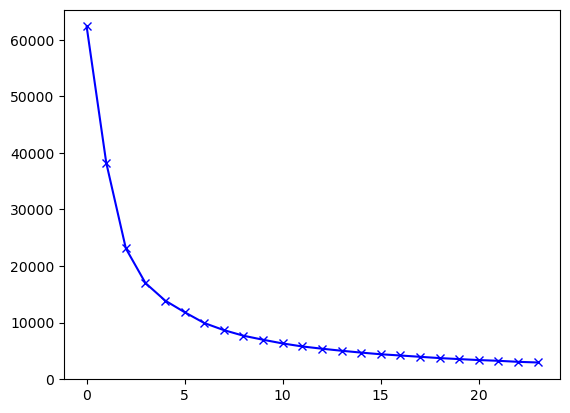

In [89]:
n_cluster = 25
cost=[]
for i in range(1,n_cluster):
    kmeans=KMeans(i)
    kmeans.fit(X_principal)
    cost.append(kmeans.inertia_)
    
plt.plot(cost,'bx-')

In [85]:
print("\n")

#### Comparing silhoutte scores for different number of clusers

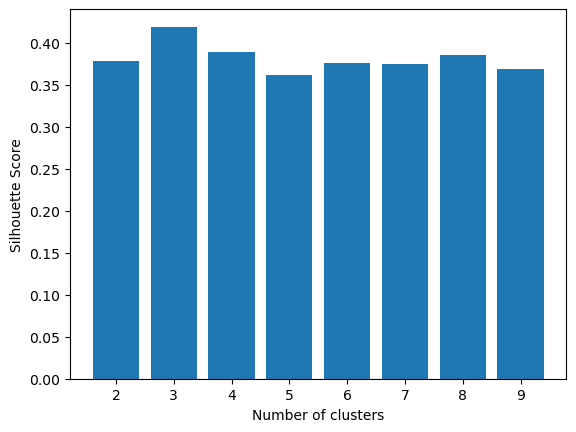

In [119]:
silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append(   
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
k = [2, 3, 4, 5, 6,7,8,9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

#### Applying K-Means with no. of clusters as 3 because it has maximum silhoutte score

In [116]:
df_default=KMeans(n_clusters=3,init='k-means++').fit(X_principal)
labels=df_default.labels_
print(labels)

[0 2 1 ... 0 0 0]


#### Visualization of clusters

In [113]:
colors={}
colors[0]='purple'
colors[1]='blue'
colors[2]='green'

#Building the color vector for each data point
color_vector = [colors[labels] for labels in labels]

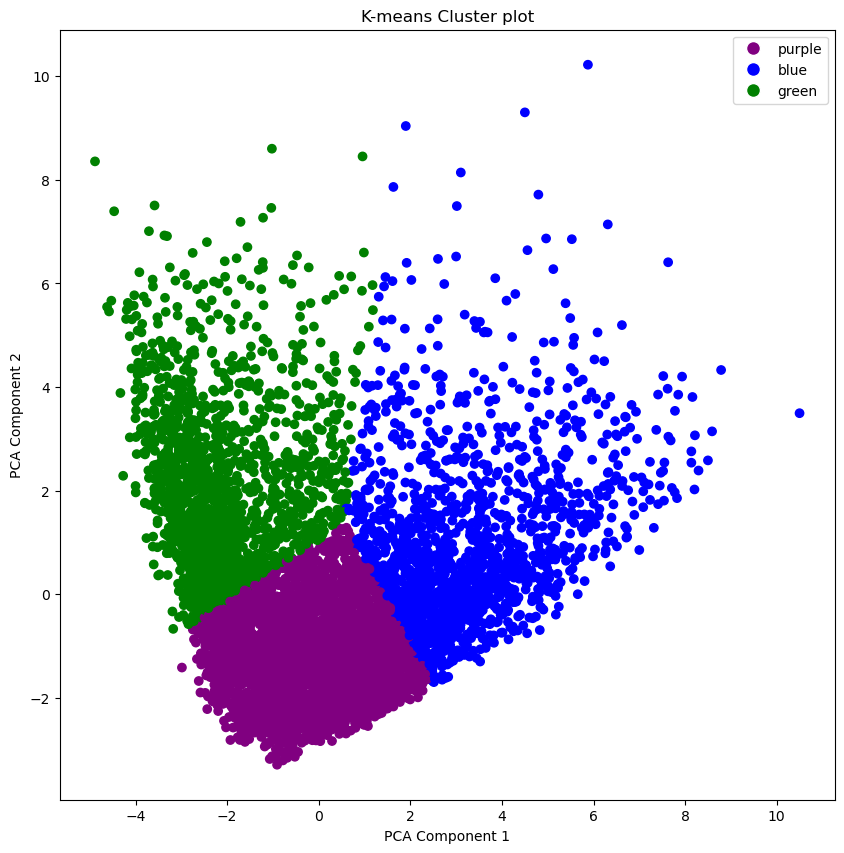

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(X_principal['P1'],X_principal['P2'],c=color_vector)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=colors[i], markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]
plt.legend(handles=legend_elements)
plt.title('K-means Cluster plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### Visulizing each feature in each cluster

In [109]:
clusters=pd.concat([x,pd.DataFrame({'cluster':labels})],axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


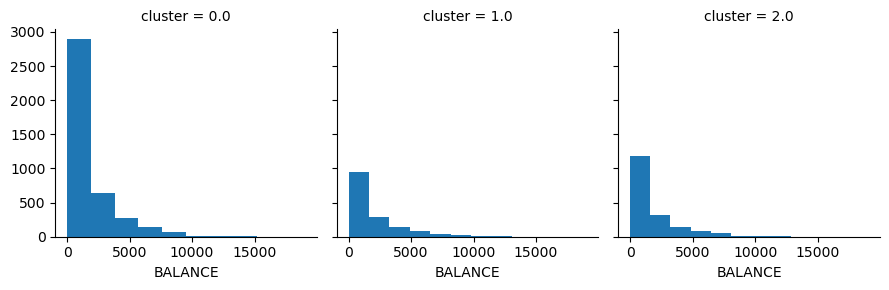

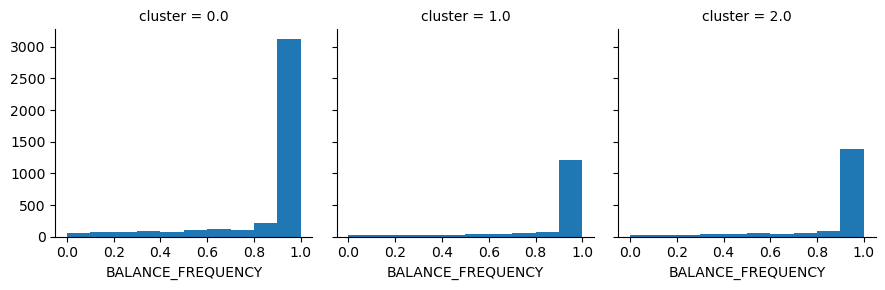

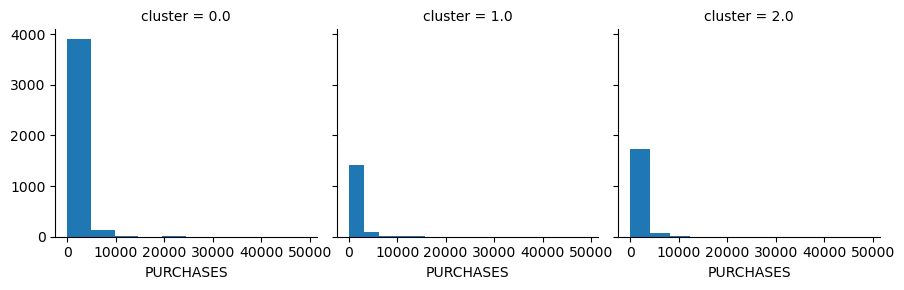

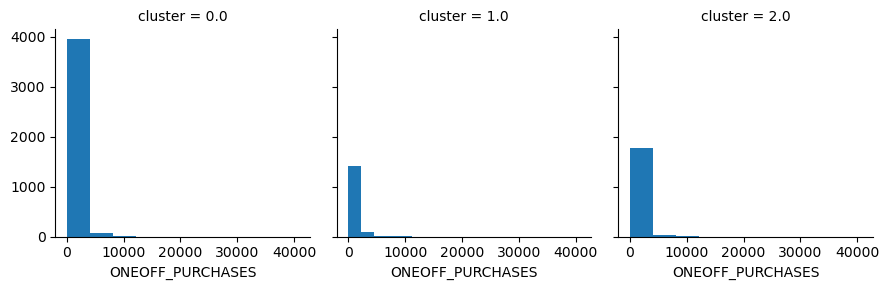

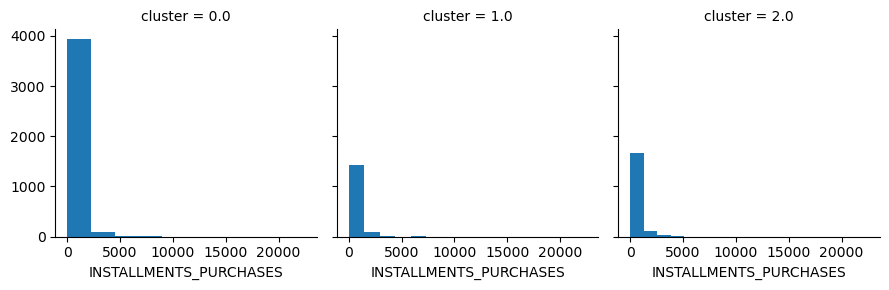

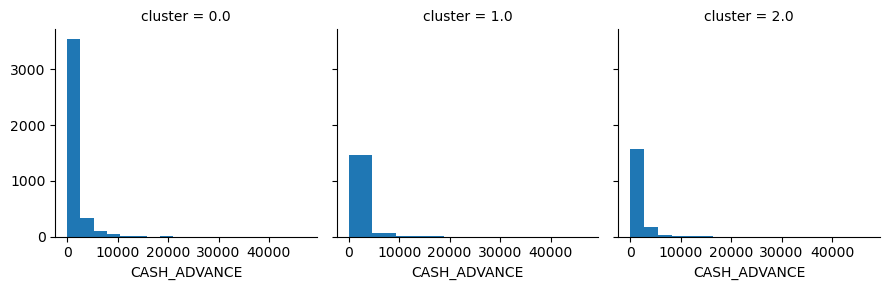

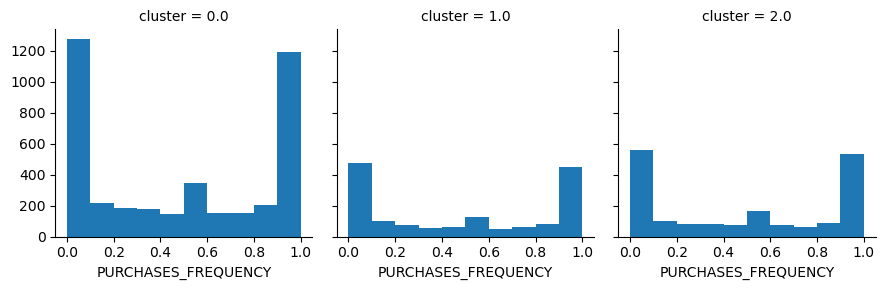

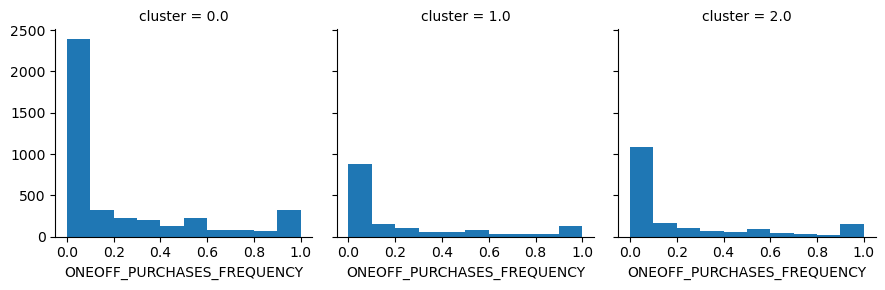

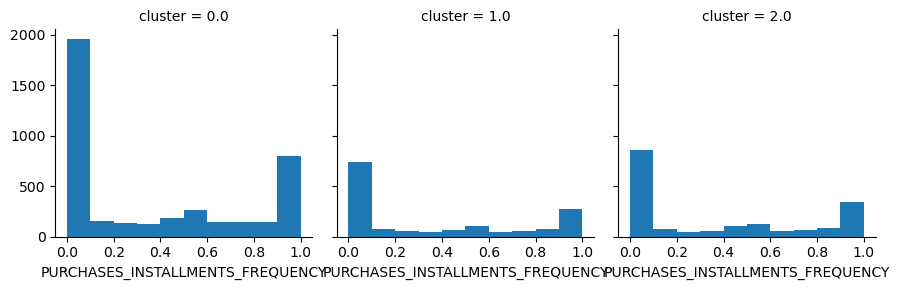

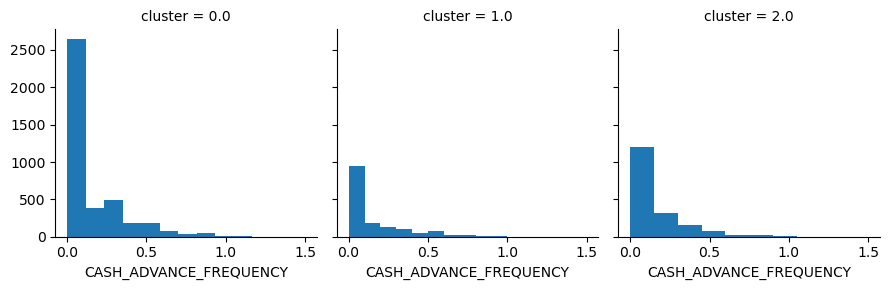

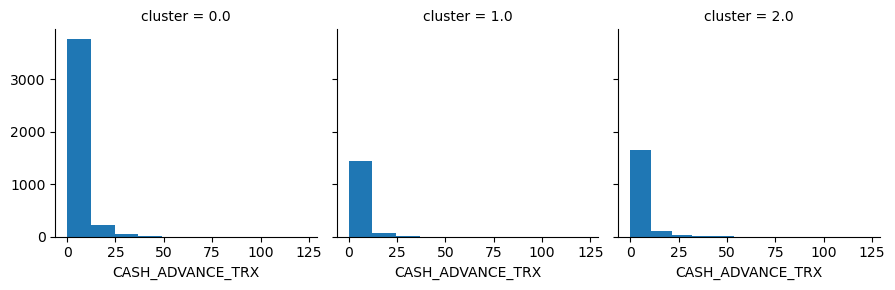

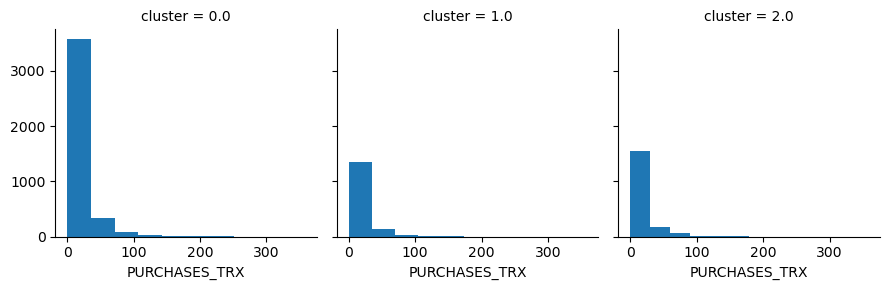

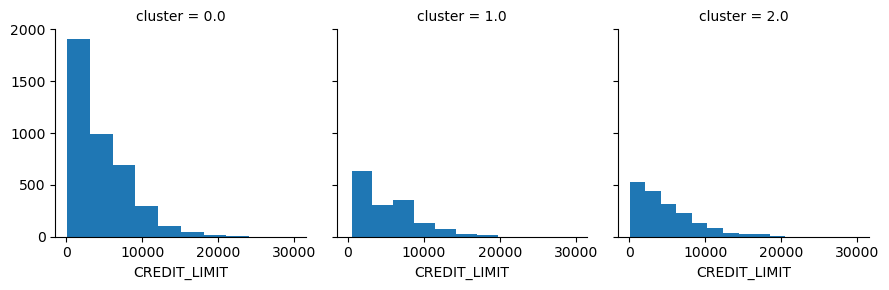

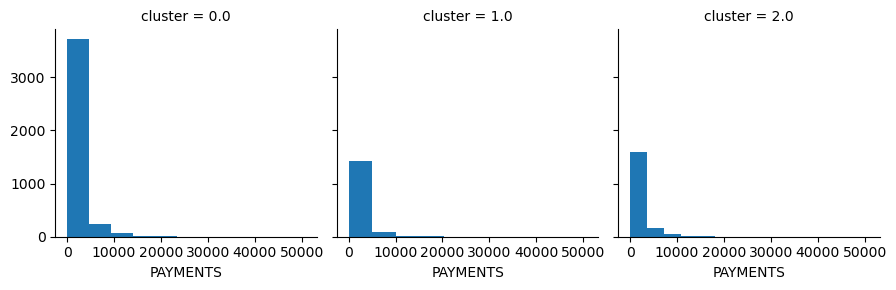

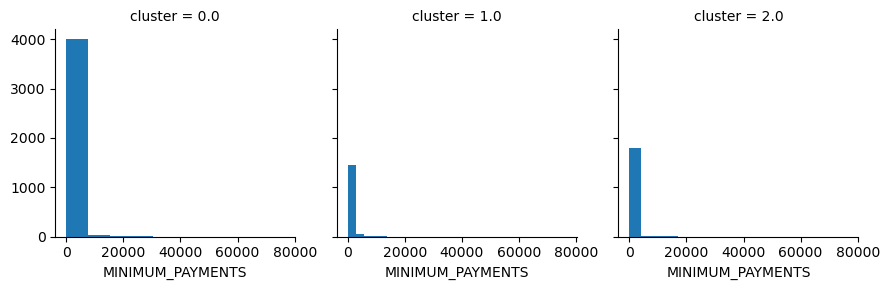

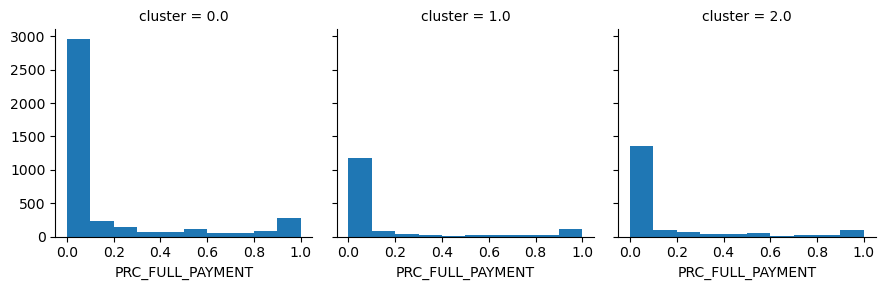

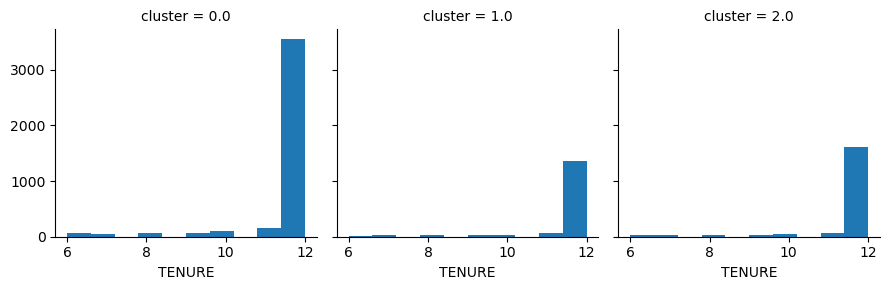

In [110]:
for cols in data_without_outlier:
    g=sns.FacetGrid(clusters,col='cluster')
    g.map(plt.hist,cols)

### Cluster Analysis
* Cluster 0 : Customers with more usage of credit card and makes more frequent puchases of product
* Cluster 1: Customers with least usage of credit card
* Cluster 2 : Customers with moderage usage of credit card